#Maratona Ciência dos Dados
###Análise de Risco Financeiro

##Usando dados para resolver problemas

### 1. Problema de Negócio

Construir um sistema de classificação de Risco do cliente para aprovação de empréstimos.

#####**Fonte dos Dados**
Base de dados *risco.csv* originada por meio dos dados da **UCI Machine Learning**.

Através do portal, podemos realizar o download de vários datasets reais de empresas de todo o mundo.

Link: https://archive.ics.uci.edu/ml/index.php

######**Documentação dos Dados:**

* **id_cliente**: Número de identificação única do cliente;
* **inad**: Índice de inadimplência do cliente;
* **Saldo_contas**: Índice referente aos saldos das contas corrente, poupança e aplicações do cliente;
* **Class_Renda**: Índice referente à classificação do cliente de acordo com sua renda;
* **Anotações**: Índice referente às anotações externas à empresa, tais como anotações SERASA, SPC e BACEN; 
* **Risco**: Risco de inadimplência do cliente, atribuído através das variáveis de análise.

###2. Análise Exploratória dos Dados

Análise exploratória dos dados contidos no dataset *risco.csv*

In [32]:
# Importando as bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# Para mostrar os graficos no Google Colab e/ou Jupyter Notebook
%matplotlib inline

In [49]:
# Carregando o dataset pandas com os dados contidos em 'risco.csv'
dataset = pd.read_csv('/content/dataset.csv')

FileNotFoundError: ignored

In [5]:
# Visualizacao do formato do dataset
print(f"O dataset possui {dataset.shape[0]} linhas e {dataset.shape[1]} colunas")

O dataset possui 150 linhas e 6 colunas


In [3]:
# Visualizacao do cabecalho do dataset
dataset.head()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [4]:
# Visualizacao das informacoes sobre os atributos do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# Verifica se existem valores ausentes no dataset
dataset.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

In [4]:
# Eliminando o atributo 'id_cliente' do pandas dataframe, pois o mesmo nao importa no modelo
dataset = dataset.drop(columns='id_cliente')

In [12]:
# Visualizacao estatistica dos atributos numericos do dataset
dataset.describe()

# OBS:
#  %25 = Inicio do boxplot e sino (curva) de dispercao
#  %50 = Ponto mais alto do sino (curva) de dispercao. Onde a media = mediana = moda
#  %75 = Fim do boxplot e sino (curva) de dispercao

,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
# Informacoes sobre o atributo target
dataset['Risco'].value_counts() # Frequencia de cada label
#dataset.Risco.value_counts() # Outra forma de calcular a frequencia

Risco_Baixo    50
Risco_Medio    50
Risco_Alto     50
Name: Risco, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


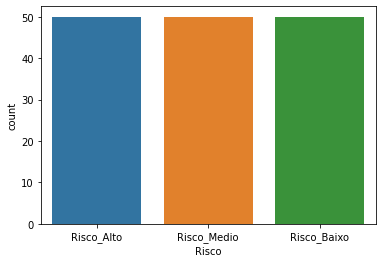

In [14]:
# Visualizacao grafica da frequencia do atributo target
sns.countplot(dataset['Risco'])

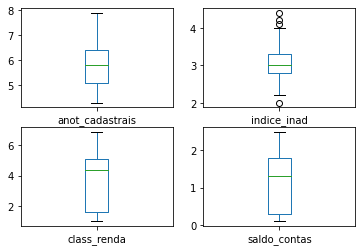

In [17]:
# Visualizacao dos dados utilizando graficos boxplot/whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# OBS: Assim podemos visualizar a curva (sino) de dispercao dos dados

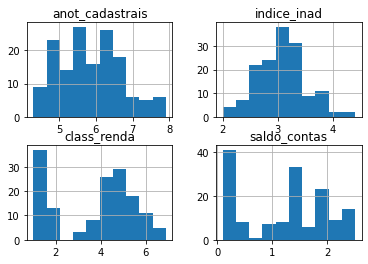

In [18]:
# Visualizacao dos dados utilizando histogramas
dataset.hist()
plt.show()

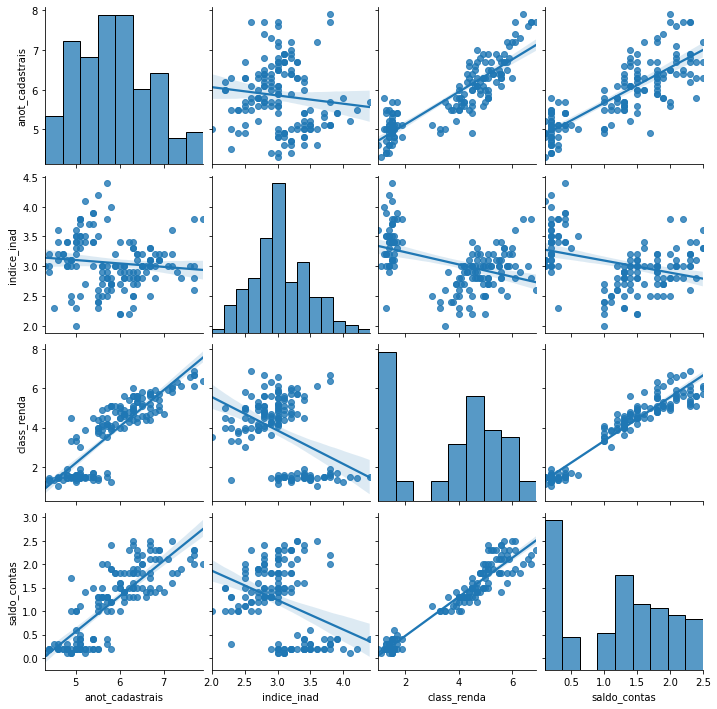

In [20]:
# Visualizacao dos dados atraves do grafico de dispersao (scatter) conhecido como pairplot
sns.pairplot(dataset,kind="reg")

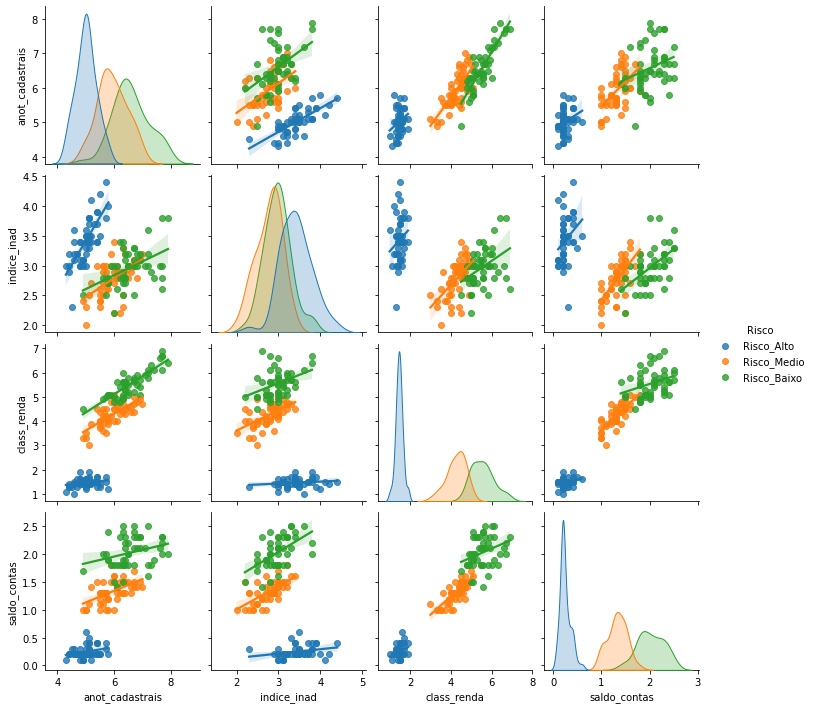

In [19]:
# Visualizacao dos dados agrupados pela label, utilizando o grafico de dispersao
sns.pairplot(dataset, hue='Risco', kind="reg") # kind=reg e a reta de regressao

###3. Pré-Processamento dos Dados

Pré-Processamento dos dados contidos no dataset *risco.csv*

In [5]:
# Separando as variaveis de entrada das de saida
x = dataset.iloc[:,:-1].values  # variaveis independentes
y = dataset.iloc[:,-1].values  # target / label / class / vairavel dependente

In [51]:
# Visualizacao das variaveis de entrada (x) das de saida (y)
print("\nVariaveis de entrada da avaliacao:\n", x[:3])
print("\nRisco - Variavel a ser predita:\n", y[:3])


Variaveis de entrada da avaliacao:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Risco - Variavel a ser predita:
 ['Risco_Alto' 'Risco_Alto' 'Risco_Alto']


In [6]:
# Divide o dataset em treino and teste
X_train, X_test, Y_train, Y_test = train_test_split(x ,y, test_size=0.2, random_state = 7)
# O teste sera de 20% e a semente randomica sera 7

In [53]:
# Visualiza o formato das variaveis de treino e teste
print(f"Formato dos dados de treino: {X_train.shape}")
print(f"Formato dos dados de teste: {X_test.shape}")

Formato dos dados de treino: (120, 4)
Formato dos dados de teste: (30, 4)


In [54]:
# Visualiza os quatro primeiros dados de treino e teste
print('Dados de treino e teste antes da padronizacao:\n')

print("--- Dados de Treino ---\n")
print("X_train:\n", X_train[:4])
print("Y_train:\n", Y_train[:4])

print("\n\n--- Dados de Teste---\n")
print("X_test:\n", X_test[:4])
print("Y_test:\n", Y_test[:4])

Dados de treino e teste antes da padronizacao:

--- Dados de Treino ---

X_train:
 [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1. ]
 [4.6 3.6 1.  0.2]
 [6.9 3.1 5.4 2.1]]
Y_train:
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo']


--- Dados de Teste---

X_test:
 [[5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]
 [5.  3.5 1.3 0.3]
 [5.6 3.  4.5 1.5]]
Y_test:
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio']


In [7]:
# Padronizacao dos dados atraves de redimensionando - Feature Scaling
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Aplica a padronizacao tirando a media do valor e dividindo pelo desvio padrao
# Deixa os dados com media igual a 0 e desvio padrao igual a 1

In [8]:
# Visualiza os quatro primeiros dados de treino e teste apos a padronizacao
print('Dados de treino e teste apos a padronizacao:\n')

print("--- Dados de Treino ---\n")
print("X_train_scaled:\n", X_train_scaled[:4])

print("\n\n--- Dados de Teste ---\n")
print("X_test_scaled:\n", X_test_scaled[:4])

Dados de treino e teste apos a padronizacao:

--- Dados de Treino ---

X_train_scaled:
 [[ 0.43325894 -0.59653573  0.62601116  0.82081788]
 [-0.15754871 -1.05688485 -0.09737951 -0.21464226]
 [-1.45732553  1.24486074 -1.48851543 -1.2501024 ]
 [ 1.26038965  0.09398794  0.95988378  1.20911544]]


--- Dados de Teste---

X_test_scaled:
 [[ 0.07877435 -0.13618661  0.79294747  0.82081788]
 [-0.51203329 -0.13618661  0.45907485  0.43252033]
 [-0.98467941  1.01468618 -1.32157912 -1.12066988]
 [-0.27571024 -0.13618661  0.45907485  0.43252033]]


##Máquinas Preditivas

###4. Construindo a Máquina Preditiva

Duas versões da máquina preditiva serão avaliadas.

#####**Versão 1: Criando um baseline**

Iremos criar a primeira versão da máquina preditiva utilizando o classificador KNN. Na sequência iremos buscar formas de melhorar a assertividade do modelo, utilizando o classificador SVM.

In [9]:
# Instanciando a maquina preditiva com o knn
mp_knn = KNeighborsClassifier(n_neighbors=30) # n_neighbors = k

#KNN: Calcula a distancia entre os vizinhos mais proximos.
# Utiliza calculo de distancias matematicas como a Euclidiana (Pitagorica), Manhattan, Minkowski, Hamming
# Devemos definir a quantidade de vizinhos mais proximos (k) para fazer o calculo da distancia

In [12]:
# Treinando a maquina preditiva KNN com os dados de treino
mp_knn = mp_knn.fit(X_train, Y_train)

In [14]:
# Realizando previsoes com os dados de teste
Y_pred_knn = mp_knn.predict(X_test)

print('Previsao do KNN com os dados de teste\n')

print("Valores REAIS com dados de teste:\n", Y_test)
print("\n\nValores PREDITOS com dados de Teste:\n", Y_pred_knn)

Previsao do KNN com os dados de teste

Valores REAIS com dados de teste:
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


Valores PREDITOS com dados de Teste:
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [17]:
# Visualizacao dos hiperparametros utilizados na construção da maquina KNN
print('KNN Hyperparams:\n', mp_knn.get_params)

KNN Hyperparams:
 <bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')>


######**Avaliando a baseline**

In [18]:
# Calculando a acuracia
print("Acuracia da mp_KNN = ", metrics.accuracy_score(Y_test, Y_pred_knn) * 100)

Acuracia da mp_KNN =  90.0


In [23]:
# Comparando o real e o predito com os dados de teste
print("Valor real vs valor predito (os 5 primeiros)")

error_knn = pd.DataFrame({"Real": Y_test, "Predito": Y_pred_knn})
error_knn.head(5)

Valor real vs valor predito (os 5 primeiros)


,Real,Predito
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Medio


In [31]:
# Visualizando atraves da confusion matrix e do classification report
cm = metrics.confusion_matrix(Y_test, Y_pred_knn)
cr = metrics.classification_report(Y_test, Y_pred_knn)

print("Matriz de Confusao: (Linha -> Real, Coluna -> Previsto)\n", cm)
print("\n\nRelatorio de Classificacao:\n", cr)

Matriz de Confusao: (Linha -> Real, Coluna -> Previsto)
 [[ 7  0  0]
 [ 0 10  1]
 [ 0  2 10]]


Relatorio de Classificacao:
               precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.83      0.91      0.87        11
 Risco_Medio       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



#####**Versão 2: Criando uma opção mais assertiva**

Iremos criar a segunda versão da máquina preditiva utilizando o classificador SVM.

In [40]:
# Instanciando a maquina preditiva com o SVM
mp_svm = SVC(
    kernel='linear', # ['linear', 'rbf']
    gamma= 1e-5  ,   # [1e-1, 1e-2, 1e-3, 1e-5]
    C=10,            # [10.0, 100.0, 1000.0, 10000.0]
    random_state=7   # Semente aleatoria em 7
)

# Tipos de SVM:
#  SVC = Prever uma classe
#  SVR = Prever um valor

In [41]:
# Treinando a maquina preditiva SVM com os dados de treino
mp_svm = mp_svm.fit(X_train, Y_train)
mp_svm

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [43]:
# Realizando previsoes com os dados de teste
Y_pred_svm = mp_svm.predict(X_test)

print('Previsao do SVM com os dados de teste\n')

print("Valores REAIS com dados de teste:\n", Y_test)
print("\n\nValores PREDITOS com dados de Teste:\n", Y_pred_svm)

Previsao do SVM com os dados de teste

Valores REAIS com dados de teste:
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


Valores PREDITOS com dados de Teste:
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


######**Avaliando a opção mais assertiva**

In [44]:
# Calculando a acuracia
print("Acuracia da mp_SVM = ", metrics.accuracy_score(Y_test, Y_pred_svm) * 100)

Acuracia da mp_SVM =  93.33333333333333


In [45]:
# Comparando o real e o predito com os dados de teste
print("Valor real vs valor predito (os 5 primeiros)")

error_svm = pd.DataFrame({"Real": Y_test, "Predito": Y_pred_svm})
error_svm.head(5)

Valor real vs valor predito (os 5 primeiros)


,Real,Predito
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Baixo


In [46]:
# Visualizando atraves da confusion matrix e do classification report
cm = metrics.confusion_matrix(Y_test, Y_pred_svm)
cr = metrics.classification_report(Y_test, Y_pred_svm)

print("Matriz de Confusao: (Linha -> Real, Coluna -> Previsto)\n", cm)
print("\n\nRelatorio de Classificacao:\n", cr)

Matriz de Confusao: (Linha -> Real, Coluna -> Previsto)
 [[ 7  0  0]
 [ 0 11  0]
 [ 0  2 10]]


Relatorio de Classificacao:
               precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.85      1.00      0.92        11
 Risco_Medio       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

